<a href="https://colab.research.google.com/github/AdrianduPlessis/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/module2-intermediate-linear-algebra/Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [0]:
import numpy as np
import statistics as stat
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
def my_mean(data):
  return sum(data)/len(data)

def sqrt(x):
  return x**0.5

def my_variance(data):
  sample_mean = sum(data)/len(data)
  deviations = []
  for element in data:
    deviations.append(element - sample_mean)
  assert(round(sum(deviations)) == 0)
  deviations_squared = []
  for element in deviations:
    deviations_squared.append(element**2)
  return sum(deviations_squared)/(len(data)-1) #varience

def my_stdev(data):
  return sqrt(my_variance(data))
  

In [0]:
sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]

In [18]:
print(f'Sales for the past week have a:\nMean: {my_mean(sales)}\nVariance: {my_variance(sales)}\nStdev: {my_stdev(sales)}')


Sales for the past week have a:
Mean: 3052.714285714286
Variance: 214387.90476190473
Stdev: 463.0204150595357


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [19]:
customers = [127, 80, 105, 92, 120, 115, 93]

store_data = pd.DataFrame({'sales' : sales, 'customers' : customers})
covariance = np.cov(store_data, rowvar=False)[0][1]
print(covariance)


7604.357142857142


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [20]:
stdev_customers = my_stdev(customers)
stdev_sales = my_stdev(sales)

correlation_coefficient = covariance / (stdev_customers * stdev_sales)
print("Correlation Coefficient is: ", round(correlation_coefficient, 3))

#check my work using library functions
if correlation_coefficient != np.corrcoef(sales, customers)[0][1]:
  print("Your calculations are off by:", correlation_coefficient/np.corrcoef(sales, customers)[0][1]*100, "%")

Correlation Coefficient is:  0.963


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [21]:
df_titanic = pd.read_csv("https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv")
df_t_numeric = df_titanic._get_numeric_data()
df_t_numeric.cov() #not using print command because Colab displays better this way

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,143117.500000,284.357034,-53.967125,-1442.939812,25.828746,1.172783,-9410.735123,591.579132,-95.438885
pclass,284.357034,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-53.967125,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-1442.939812,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,25.828746,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,1.172783,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-9410.735123,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,591.579132,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-95.438885,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


In [22]:
df_t_numeric.corr()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,1.000000,0.897822,-0.293717,-0.296172,0.065594,0.003584,-0.481215,0.015558,-0.603727
pclass,0.897822,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.293717,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.296172,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.065594,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.003584,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.481215,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,0.015558,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.603727,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

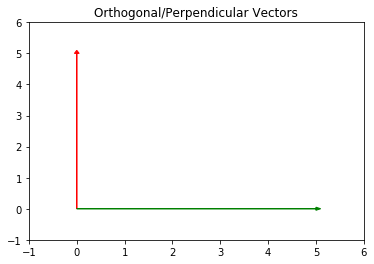

In [23]:
A = [0,5]
B = [5,0]

#Plot vectors
plt.arrow(0,0, A[0], A[1], head_width=0.1, head_length=0.1, color='red')
plt.arrow(0,0, B[0], B[1], head_width=0.1, head_length=0.1, color='green')
plt.xlim(-1, 6)
plt.ylim(-1, 6)
plt.title("Orthogonal/Perpendicular Vectors")
plt.show()


## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [24]:
a = [-5,3,7]
b = [6,-8,2]

if (np.dot(a,b) == 0):
  print("These vectors are orthogonal, since their dot product is 0.")
else:
  print("These vectors are not orthogonal, since their dot product is", 
        np.dot(a,b), 
        "not 0.")
  

These vectors are not orthogonal, since their dot product is -40 not 0.


## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [25]:
c = [2,-15,6,20]

norm_squared = np.linalg.norm(c)**2
dot_product = np.dot(c,c)
times_transpose = np.matmul(np.transpose(c), c)

print("Norm Squared:", norm_squared)
print("Dot product with self:", dot_product)
print("Multiplied by self transposed:", times_transpose)

Norm Squared: 665.0
Dot product with self: 665
Multiplied by self transposed: 665


All these quantities are equal

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

\begin{align}
d = 7\hat{i} + 12\hat{j}
\end{align}

\begin{align}
e = 2\hat{i} + 11\hat{j} - 8\hat{k}
\end{align}

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [28]:
f = [4,12,11,9,2]
f_norm = np.linalg.norm(f)
f_unit_vector = np.divide(f, f_norm)
print("The unit vector of f is:", f_unit_vector)

The unit vector of f is: [0.20908335 0.62725005 0.57497921 0.47043754 0.10454167]


# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

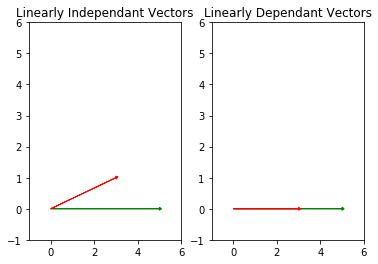

In [45]:
#Plot Linearly Independant Vectors
plt.subplot(1,2,1)
plt.arrow(0,0, 5, 0, head_width=0.1, head_length=0.1, color='green')
plt.arrow(0,0, 3, 1, head_width=0.1, head_length=0.1, color='red')
plt.xlim(-1, 6)
plt.ylim(-1, 6)
plt.title("Linearly Independant Vectors")


#Plot Linearly Dependant Vectors
plt.subplot(1,2,2)
plt.arrow(0,0, 5, 0, head_width=0.1, head_length=0.1, color='green')
plt.arrow(0,0, 3, 0, head_width=0.1, head_length=0.1, color='red')
plt.xlim(-1, 6)
plt.ylim(-1, 6)
plt.title("Linearly Dependant Vectors")

plt.show()

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

In [65]:
import sympy as sp
g = [1,2]
h = [4,8]
gh = sp.Matrix([g,h])
pivot_cols = gh.rref()[1]
span = len(pivot_cols)
print("The span is", span)

The span is 1


$\mathbb{R}^{1}$

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [67]:
l = [1,2,3]
m = [-1,0,7]
n = [4,8,2]

matrix_lmn = sp.Matrix([l,m,n])
pivot_cols = matrix_lmn.rref()[1]
span = len(pivot_cols)
print("The span is", span)


The span is 3


$\mathbb{R}^{3}$

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



## 6.2 What does it mean to form a basis?

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

## 7.2 What does the rank of a matrix tell us?

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

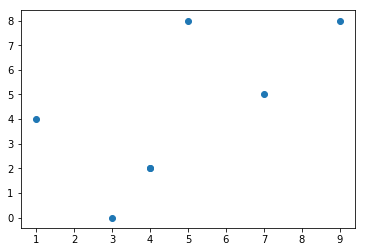

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()